In [54]:
#Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [62]:
# read the  data into a pandas DataFrame
df = pd.read_csv('Gambling_data.csv', delimiter=';')

In [5]:
#Display the first few lines of the data
df.head()

,user_id,rg_case,missing_daily_transactions,first_deposit_date,registration_date,country_name,language_name,gender,year_of_birth,age_at_registration,...,percent_lost_liveaction,sum_stakes_casino,sum_bets_casino,bettingdays_casino,duration_casino,frequency_casino,bets_per_day_casino,euros_per_bet_casino,net_loss_casino,percent_lost_casino
0,31965,1,0,5/8/2000,9/17/1999,Germany,German,M,1971.0,27.0,...,0.132400,20366.85,1672.0,18.0,1317.0,0.013667,92.888889,12.181130,908.25,0.044595
1,32639,0,0,11/21/2002,10/3/1999,Austria,German,M,1969.0,29.0,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36822,0,0,5/8/2000,3/20/2000,Austria,German,M,1970.0,29.0,...,-1.029167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36916,1,0,6/13/2000,3/21/2000,Austria,German,M,1969.0,31.0,...,1.000000,20890.75,9194.0,8.0,3076.0,0.002601,1149.250000,2.272216,1139.00,0.054522
4,38386,1,0,6/9/2000,4/21/2000,Austria,German,M,1974.0,25.0,...,NaN,4.00,4.0,1.0,1.0,1.000000,4.000000,1.000000,4.00,1.000000


In [6]:
#Checking the Missing values of the data for each column
df.isnull().sum()

user_id                          0
rg_case                          0
missing_daily_transactions       0
first_deposit_date               0
registration_date              167
country_name                   167
language_name                    0
gender                           0
year_of_birth                  167
age_at_registration            167
sum_stakes_fixedodds           351
sum_bets_fixedodds             351
bettingdays_fixedodds          351
duration_fixedodds             351
frequency_fixedodds            351
bets_per_day_fixedodds         351
euros_per_bet_fixedodds        351
net_loss_fixedodds             351
percent_lost_fixedodds         351
sum_stakes_liveaction          979
sum_bets_liveaction            979
bettingdays_liveaction         979
duration_liveaction            979
frequency_liveaction           979
bets_per_day_liveaction        979
euros_per_bet_liveaction       979
net_loss_liveaction            979
percent_lost_liveaction        979
sum_stakes_casino   

In [9]:
#Dropping all the Null values from the data
df = df.dropna()

In [10]:
df.describe()

,user_id,rg_case,missing_daily_transactions,year_of_birth,age_at_registration,sum_stakes_fixedodds,sum_bets_fixedodds,bettingdays_fixedodds,duration_fixedodds,frequency_fixedodds,...,percent_lost_liveaction,sum_stakes_casino,sum_bets_casino,bettingdays_casino,duration_casino,frequency_casino,bets_per_day_casino,euros_per_bet_casino,net_loss_casino,percent_lost_casino
count,1.300000e+03,1300.000000,1300.0,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1.300000e+03,1.300000e+03,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,3.952734e+06,0.750000,0.0,1977.201538,28.426923,8161.866511,1100.311538,129.833077,980.860769,0.173540,...,0.139647,8.711835e+04,1.223152e+04,39.303846,496.512308,0.305832,154.366459,13.391206,2054.151687,0.133570
std,2.500210e+06,0.433179,0.0,9.193883,9.084076,28259.099369,5194.454915,202.702866,715.727421,0.218284,...,0.457972,5.164468e+05,7.496547e+04,95.148104,599.102817,0.382348,274.449360,58.064585,10013.139521,0.325427
min,3.196500e+04,0.000000,0.0,1918.000000,17.000000,0.464700,1.000000,1.000000,1.000000,0.003086,...,-7.000374,3.500000e-01,1.000000e+00,1.000000,1.000000,0.001365,1.000000,0.010935,-26567.740000,-6.600000
25%,1.758129e+06,0.750000,0.0,1973.000000,22.000000,226.131075,40.000000,17.000000,417.500000,0.038732,...,0.025380,1.410000e+02,5.175000e+01,2.000000,9.000000,0.026424,15.179427,1.152743,9.205000,0.024773
50%,3.689193e+06,1.000000,0.0,1979.000000,26.000000,1243.610000,159.000000,55.000000,897.500000,0.092542,...,0.099527,1.719815e+03,4.600000e+02,7.000000,268.500000,0.093739,56.919591,3.224014,85.500000,0.064158
75%,5.856904e+06,1.000000,0.0,1984.000000,33.000000,5286.057325,620.000000,160.250000,1440.500000,0.200922,...,0.244370,1.718975e+04,4.005000e+03,30.000000,790.500000,0.500000,170.244048,9.199564,653.600925,0.164425
max,9.753172e+06,1.000000,0.0,1991.000000,90.000000,669482.668100,138866.000000,2155.000000,3759.000000,1.000000,...,1.000000,1.205485e+07,2.292042e+06,970.000000,3168.000000,1.000000,3159.250000,1705.726766,175054.350000,1.000000


In [14]:
#converting the Data in Pandas DataFrame
df = pd.DataFrame(df)

***Part 1***




***Histogram:*** This plot can be used to visualize the distribution of numerical variables

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'rg_case'}>,
        <Axes: title={'center': 'missing_daily_transactions'}>,
        <Axes: title={'center': 'year_of_birth'}>,
        <Axes: title={'center': 'age_at_registration'}>,
        <Axes: title={'center': 'sum_stakes_fixedodds'}>],
       [<Axes: title={'center': 'sum_bets_fixedodds'}>,
        <Axes: title={'center': 'bettingdays_fixedodds'}>,
        <Axes: title={'center': 'duration_fixedodds'}>,
        <Axes: title={'center': 'frequency_fixedodds'}>,
        <Axes: title={'center': 'bets_per_day_fixedodds'}>,
        <Axes: title={'center': 'euros_per_bet_fixedodds'}>],
       [<Axes: title={'center': 'net_loss_fixedodds'}>,
        <Axes: title={'center': 'percent_lost_fixedodds'}>,
        <Axes: title={'center': 'sum_stakes_liveaction'}>,
        <Axes: title={'center': 'sum_bets_liveaction'}>,
        <Axes: title={'center': 'bettingdays_liveaction'}>,
        <Axes: title={'center': 'dura

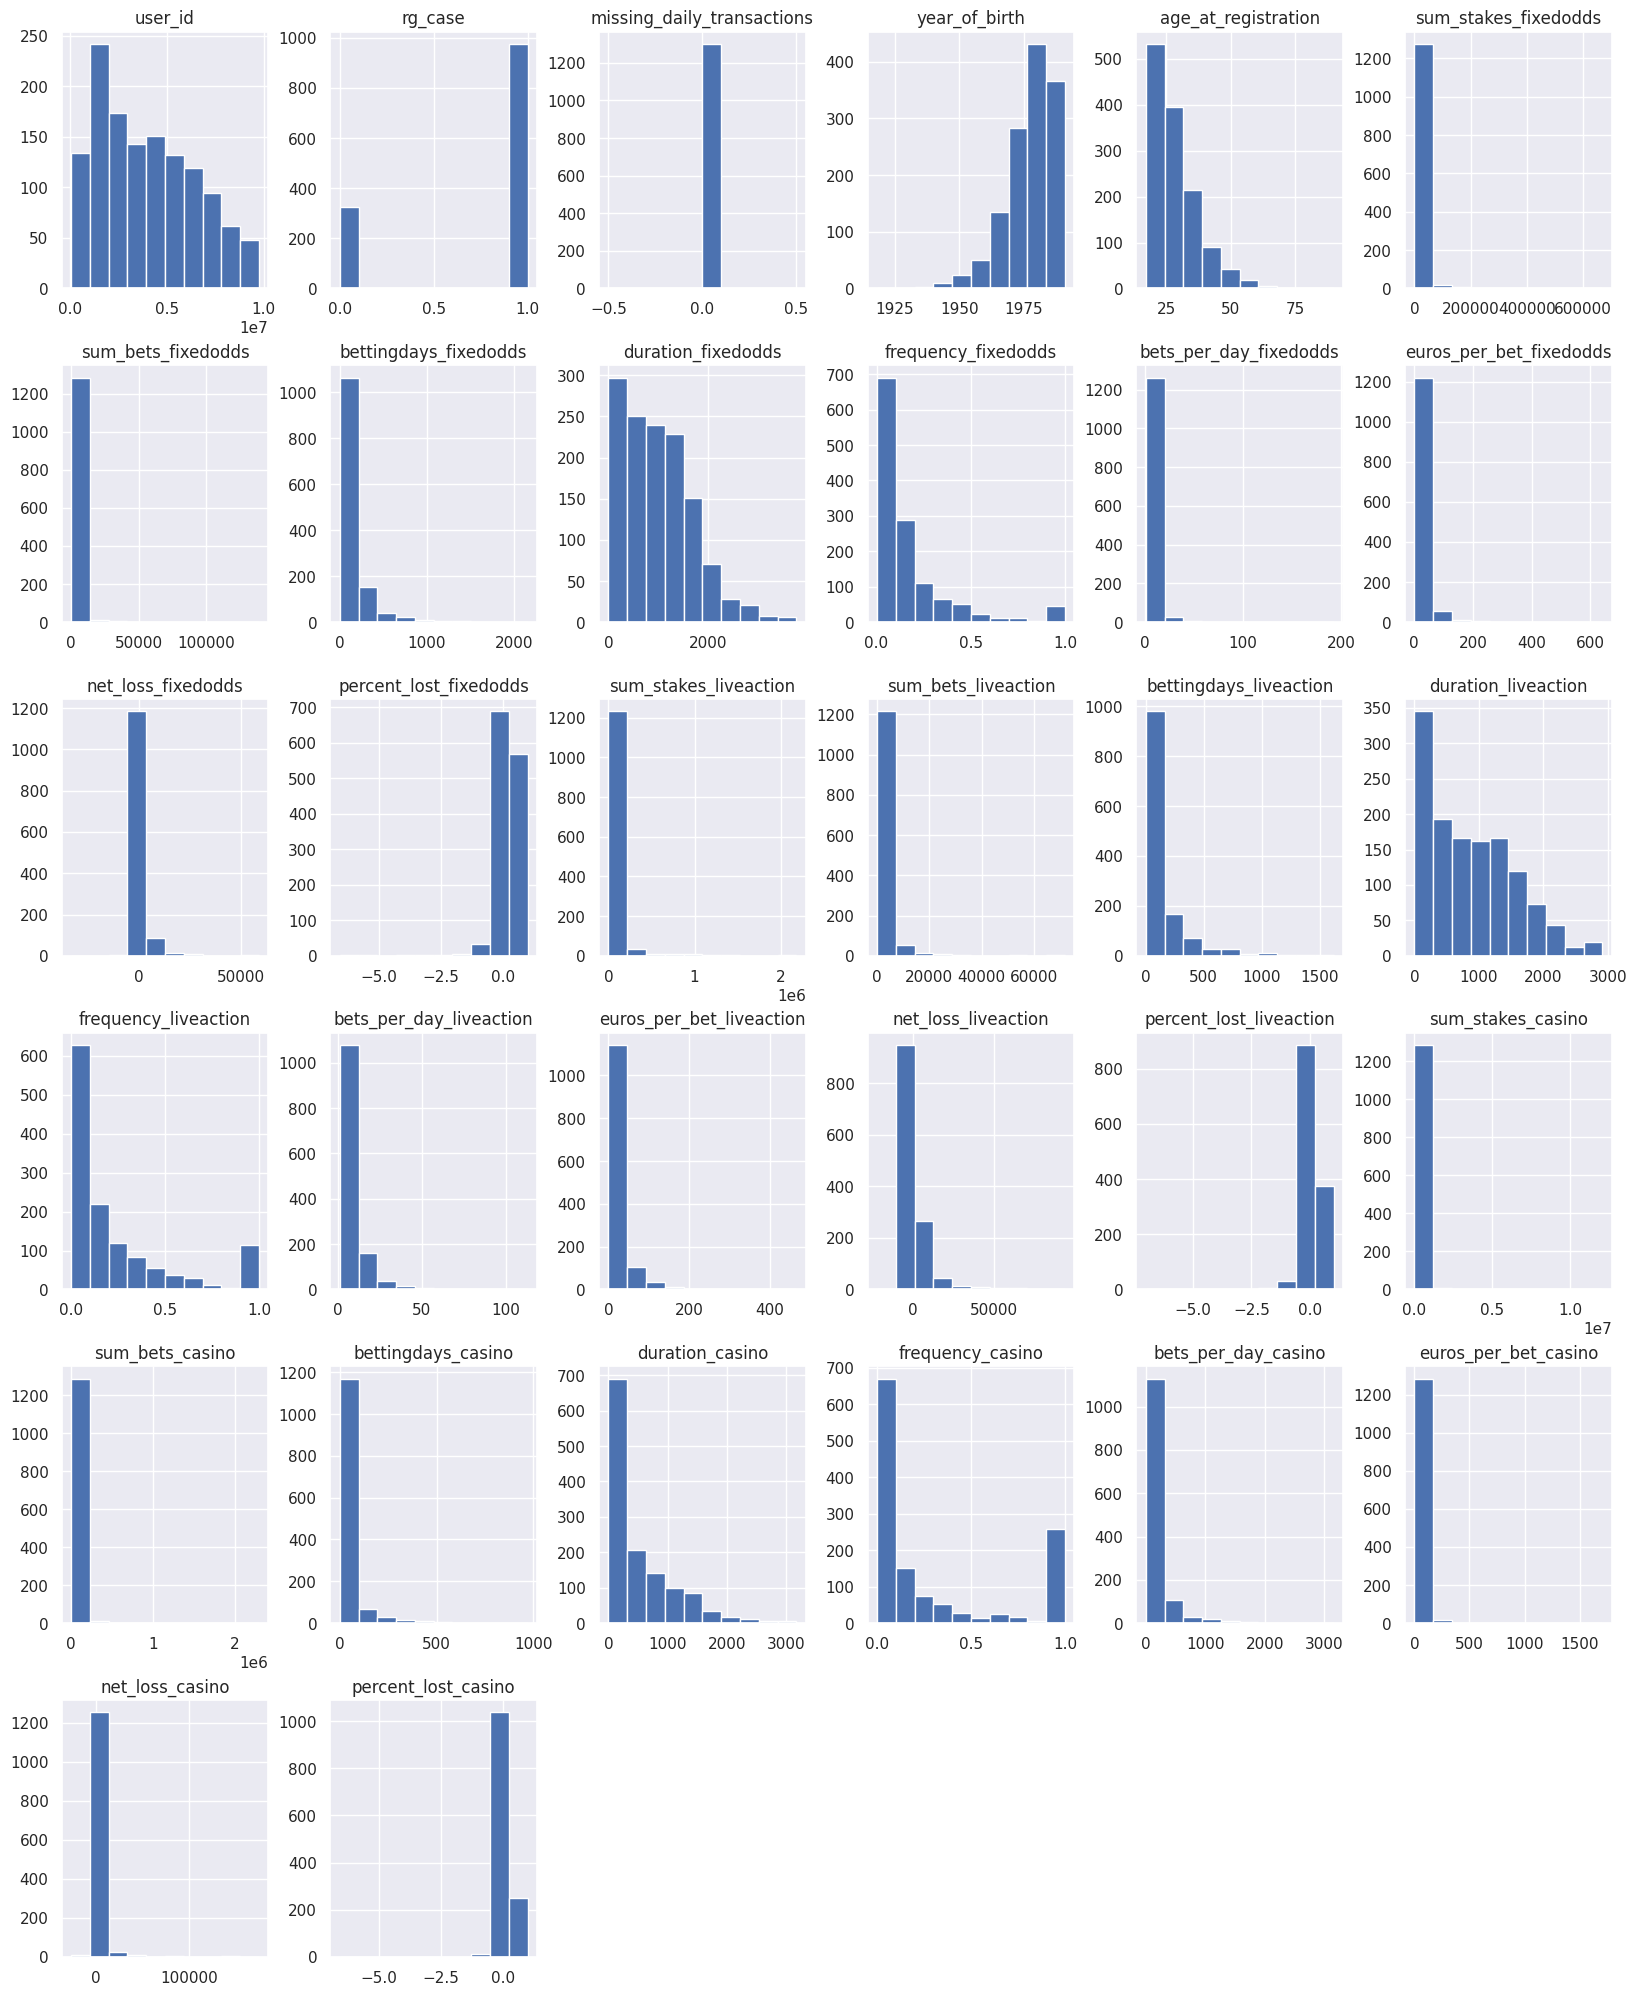

In [20]:
#Histogram
df.hist(figsize = (20,25))

***Scatter plot:*** A scatter plot can be used to visualize the relationship between two numerical variables

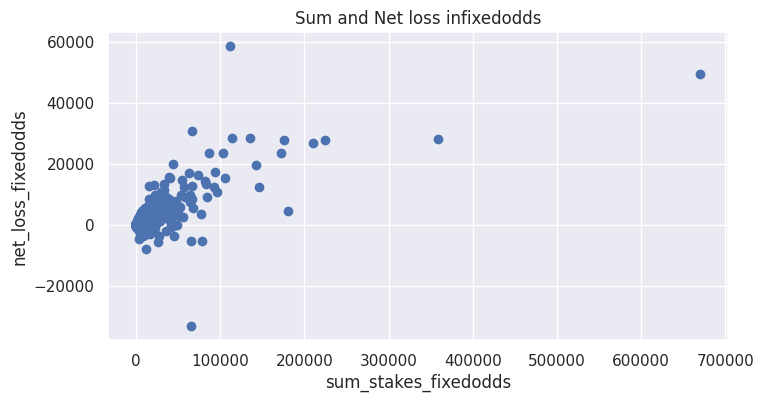

In [26]:
# Plot a  chart using matplotlib
plt.figure(figsize=(8,4))
plt.scatter(df['sum_stakes_fixedodds'], df['net_loss_fixedodds'])
plt.xlabel('sum_stakes_fixedodds')
plt.ylabel('net_loss_fixedodds')
plt.title('Sum and Net loss infixedodds')
plt.show()

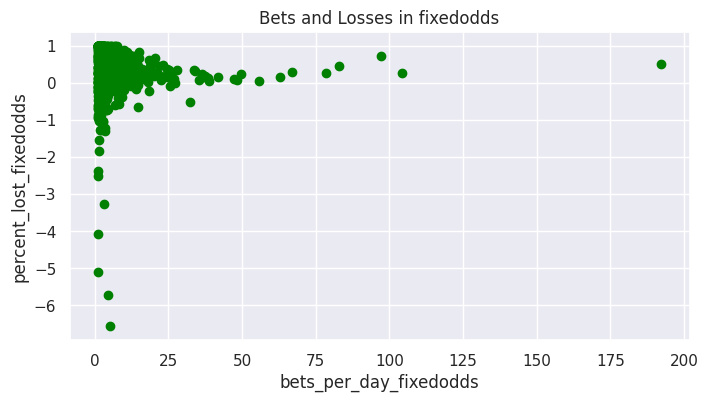

In [30]:
# Plot a  chart using matplotlib
plt.figure(figsize=(8,4))
plt.scatter(df['bets_per_day_fixedodds'], df['percent_lost_fixedodds'], color = 'green')
plt.xlabel('bets_per_day_fixedodds')
plt.ylabel('percent_lost_fixedodds')
plt.title('Bets and Losses in fixedodds')
plt.show()

***Bar chart:*** A bar chart can be used to visualize the frequency distribution of categorical variables

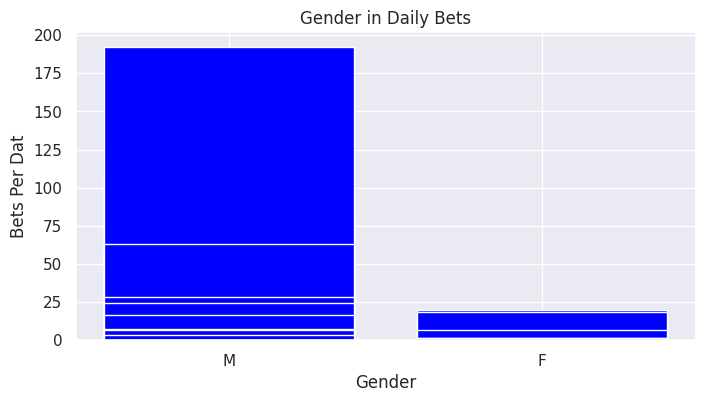

In [34]:
# Plot a  chart using matplotlib
plt.figure(figsize=(8,4))
plt.bar(df['gender'], df['bets_per_day_fixedodds'], color = 'blue')
plt.xlabel('Gender')
plt.ylabel('Bets Per Day')
plt.title('Gender in Daily Bets')
plt.show()

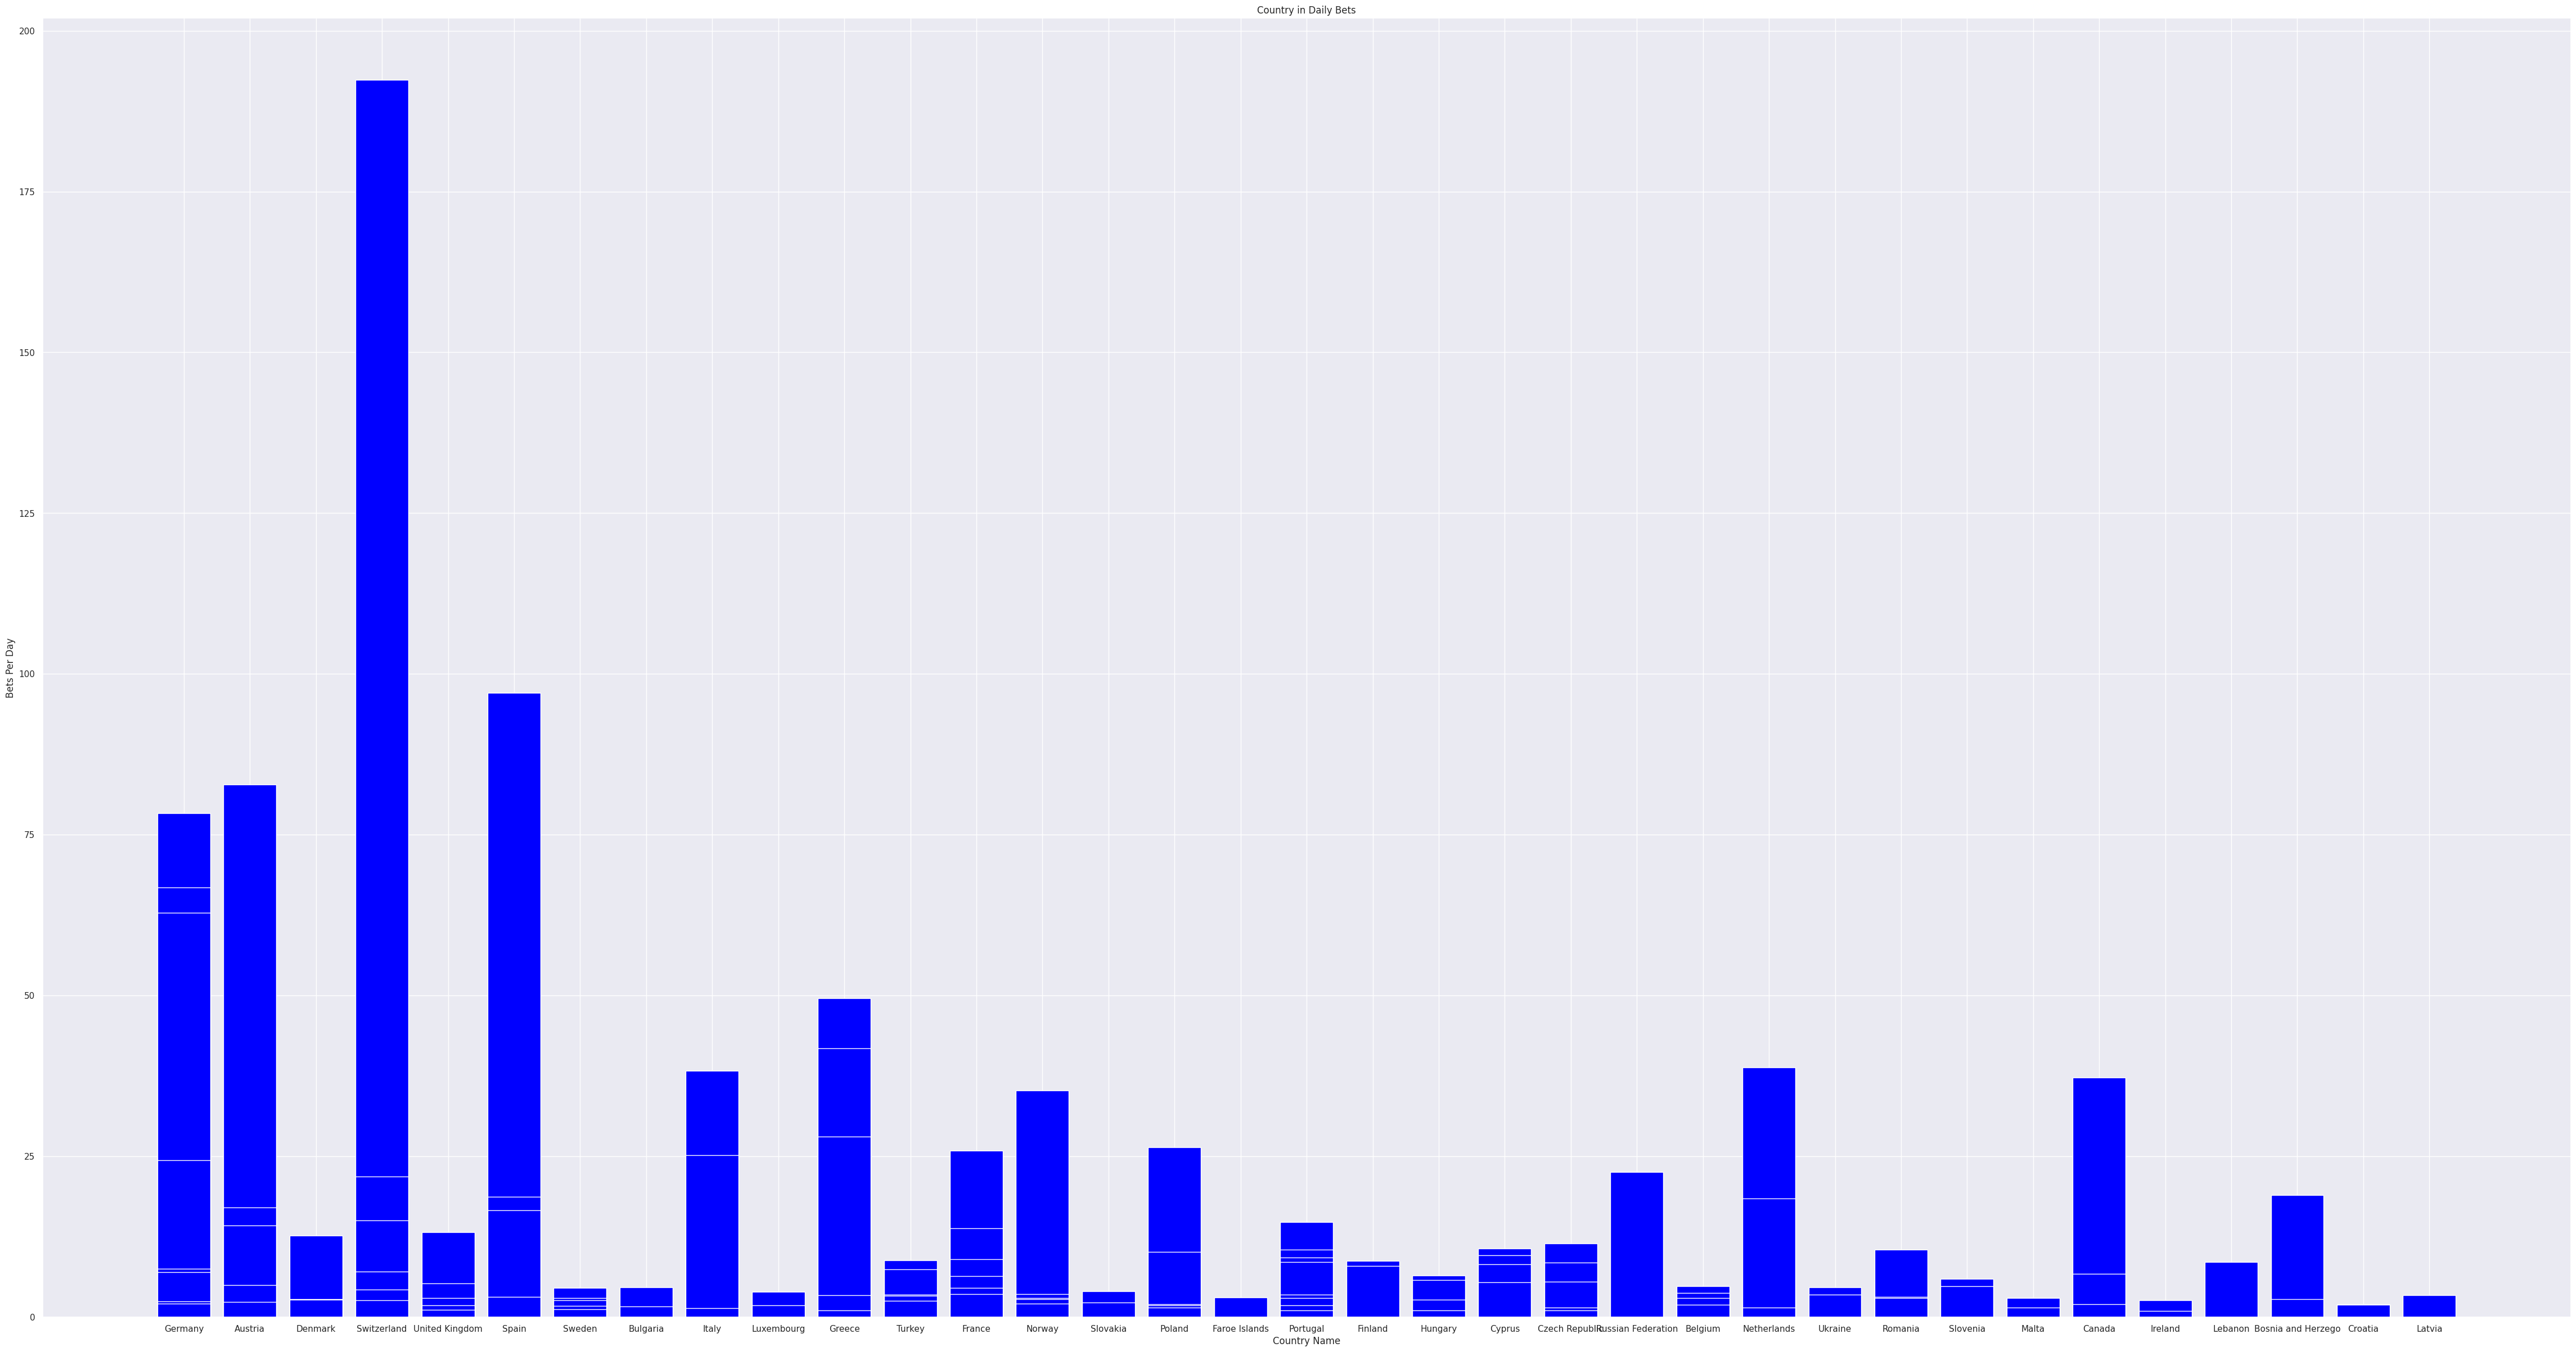

In [43]:
# Plot a  chart using matplotlib
plt.figure(figsize=(58,30))
plt.bar(df['country_name'], df['bets_per_day_fixedodds'], color = 'blue')
plt.xlabel('Country Name')
plt.ylabel('Bets Per Day')
plt.title('Country in Daily Bets')
plt.show()

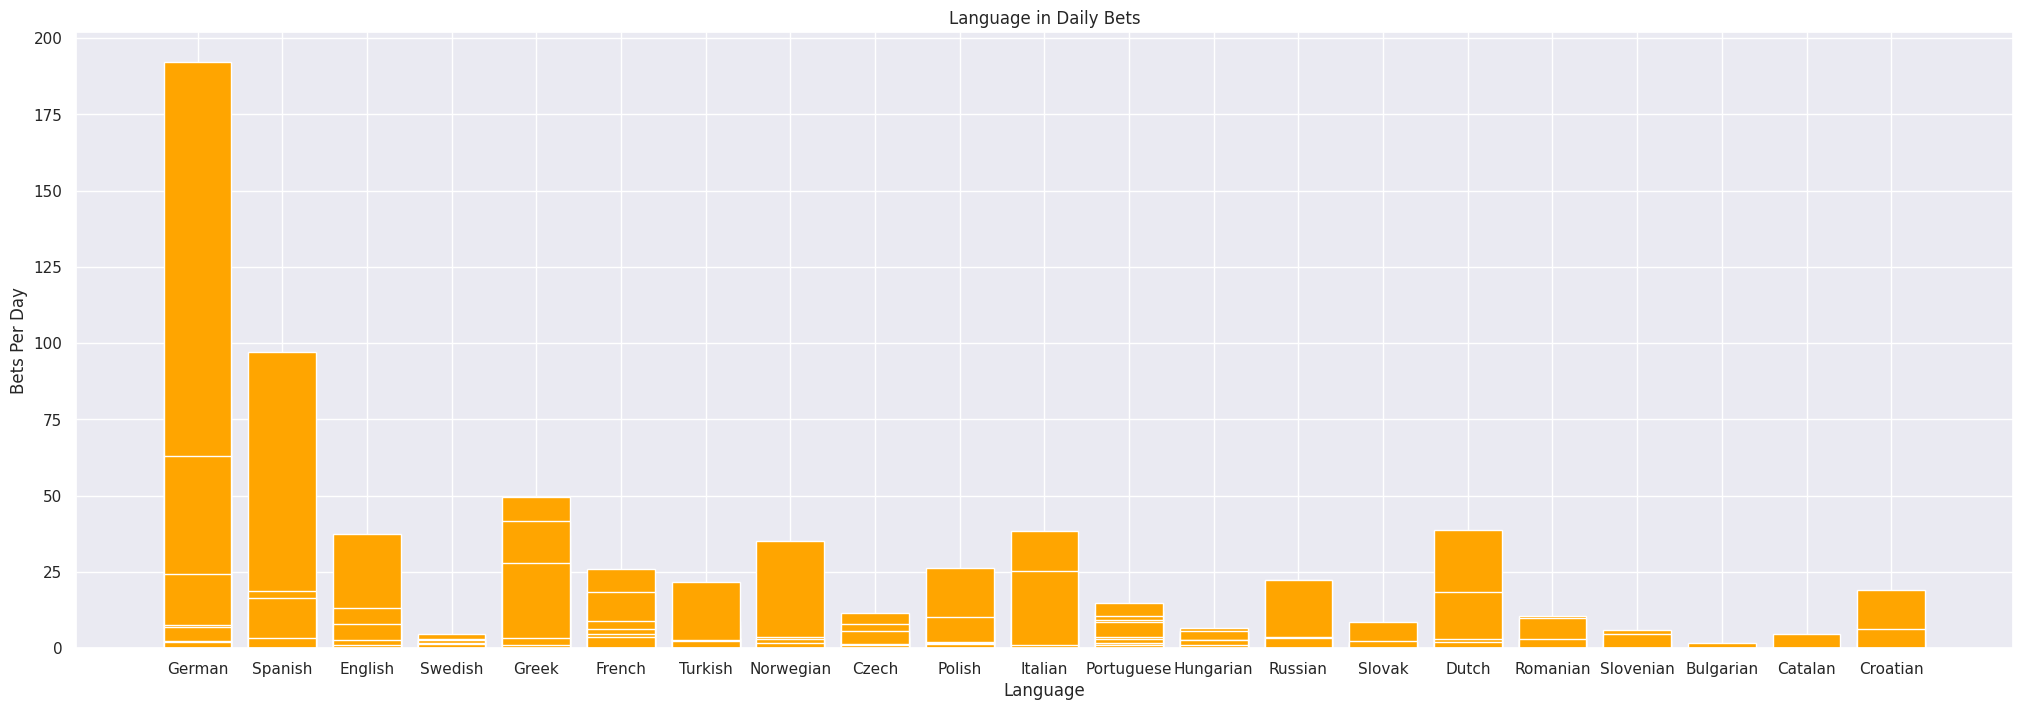

In [48]:
# Plot a  chart using matplotlib
plt.figure(figsize=(25,8))
plt.bar(df['language_name'], df['bets_per_day_fixedodds'], color = 'orange')
plt.xlabel('Language')
plt.ylabel('Bets Per Day')
plt.title('Language in Daily Bets')
plt.show()

***Line chart:*** A line chart can be used to visualize the trend over time

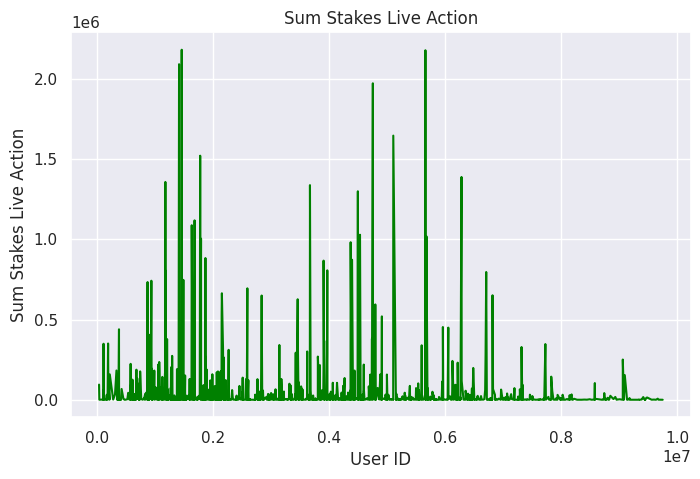

In [57]:
#Line Chart
plt.figure(figsize=(8,5)) 
plt.plot(df['user_id'], df['sum_stakes_liveaction'], color='green')
plt.title('Sum Stakes Live Action')
plt.xlabel('User ID')
plt.ylabel('Sum Stakes Live Action')
plt.show()

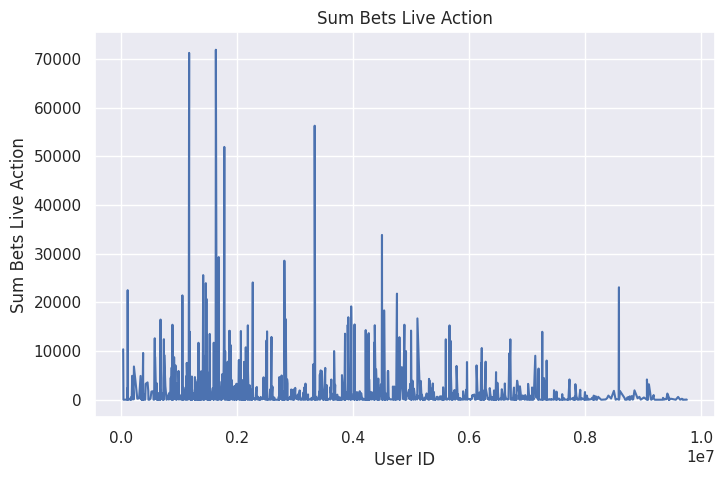

In [56]:
#Line Chart
plt.figure(figsize=(8,5)) 
plt.plot(df['user_id'], df['sum_bets_liveaction'])
plt.title('Sum Bets Live Action')
plt.xlabel('User ID')
plt.ylabel('Sum Bets Live Action')
plt.show()

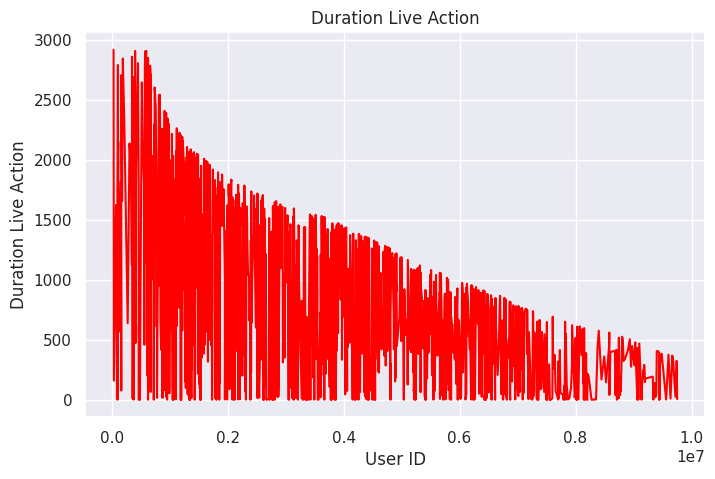

In [55]:
#Line Chart
plt.figure(figsize=(8,5)) 
plt.plot(df['user_id'], df['duration_liveaction'],color='red')
plt.title('Duration Live Action')
plt.xlabel('User ID')
plt.ylabel('Duration Live Action')
plt.show()

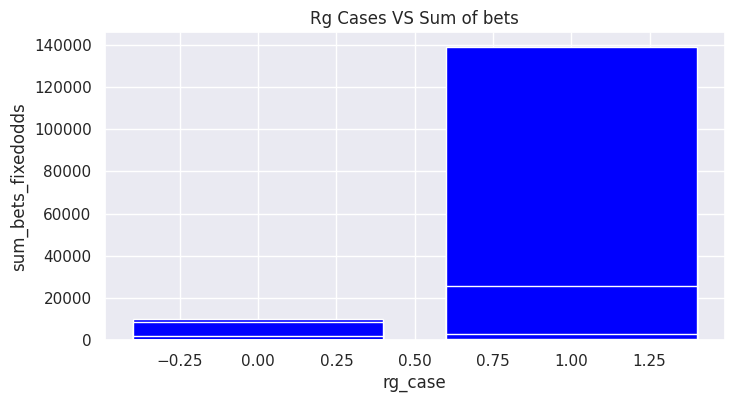

In [59]:
# Plot a  chart using matplotlib
plt.figure(figsize=(8,4))
plt.bar(df['rg_case'], df['sum_bets_fixedodds'], color = 'blue')
plt.xlabel('rg_case')
plt.ylabel('sum_bets_fixedodds')
plt.title('Rg Cases VS Sum of bets')
plt.show()

*From the given data, one variable that might be of special interest for RG (responsible gaming) purposes is the "Bet" column. This column represents the amount of money being wagered by each player, and it can be used to track the betting behavior of individual players over time. By analyzing this data, RG analysts can identify players who may be at risk of developing a gambling problem and implement appropriate interventions.*

***Part 2***

***Q1:*** Can you find users that seem to be problematic due to high “net_loss” - are other data sources relevant when doing that analyses?

In [65]:
# Group the data by user_id and sum the net_loss values for each user
user_net_loss = df.groupby('user_id')['net_loss_fixedodds'].sum()

# Find the users with the highest net loss
problematic_users = user_net_loss[user_net_loss > 1000]

# Print the list of problematic users
print(problematic_users)

user_id
31965       1459.082600
107124      7857.087800
113136     17059.145700
165200      2288.558400
187808      5404.044200
               ...     
9440523     1236.400000
9442290     1032.990000
9450603     1446.449213
9616886     1371.390000
9648676     1846.689137
Name: net_loss_fixedodds, Length: 569, dtype: float64


***Q2:*** Based on your analyses, can you find users labelled with “0” in the “rg_case” column that seems mislabelled?

In [66]:
# select users with rg_case=0
rg_case_0 = df[df['rg_case'] == 0]

# group by user_id and sum net_loss
user_net_loss = rg_case_0.groupby('user_id')['net_loss_fixedodds'].sum().reset_index()

# select users with net_loss > 0
mislabelled_users = user_net_loss[user_net_loss['net_loss_fixedodds'] > 0]['user_id'].tolist()

print("Mislabelled users with rg_case=0 and net_loss > 0: ", mislabelled_users)

Mislabelled users with rg_case=0 and net_loss > 0:  [32639, 36822, 80281, 90746, 92140, 96950, 99596, 100167, 114137, 134759, 157710, 165200, 166143, 167997, 212099, 233644, 349495, 349855, 350228, 366074, 376200, 386047, 399987, 408460, 411144, 411173, 462391, 465623, 467890, 468786, 469615, 478147, 485929, 486829, 489459, 490561, 502856, 537380, 539496, 540422, 553902, 555911, 563554, 576698, 578303, 579708, 594169, 599858, 604895, 606177, 610512, 612580, 615124, 617512, 626809, 626818, 627380, 636671, 637178, 637789, 640946, 646063, 649274, 651518, 654065, 656052, 659457, 667874, 669331, 671657, 672421, 672622, 673300, 707265, 708624, 709000, 709426, 712428, 714120, 721385, 722809, 734137, 735381, 745854, 758982, 767729, 779719, 779784, 780107, 780616, 781520, 819431, 819712, 819744, 820287, 820333, 821915, 823927, 835609, 839105, 842884, 860020, 860186, 867737, 872925, 872943, 872995, 873056, 876669, 876762, 876836, 877236, 877969, 878034, 879490, 881434, 897560, 912981, 918586, 93

***Q3:*** For the problematic gambling users that are not included in your high “net_loss” group, can you find another reasoning that encapsulates
another group of users? What data would you use and why is that data interesting?

In [70]:
# Extract the data for the problematic users
problematic_data = df[df['user_id'].isin(problematic_users.index)]

# Group the data by user_id and bet_type and calculate the sum of stakes
bet_days = problematic_data.groupby(['user_id', 'bettingdays_fixedodds']).sum()

# Pivot the data to create a table of user_id vs. bet_type
bet_days = bet_days.reset_index().pivot(index='user_id', columns='bettingdays_fixedodds')

# Fill any missing values with 0
bet_days.fillna(0, inplace=True)

# Print the table of bet types for the problematic users
print(bet_days)


                      rg_case                                            \
bettingdays_fixedodds  7.0    8.0    10.0   11.0   12.0   13.0   14.0     
user_id                                                                   
31965                     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
107124                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
113136                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
165200                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
187808                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...                       ...    ...    ...    ...    ...    ...    ...   
9440523                   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9442290                   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9450603                   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9616886                   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9648676                  

This table can help us identify any similarities or differences in the days placed by the problematic users, which could be used to group them into different categories based on their behavior or preferences. We could then use this information to tailor our approach to each group and address any issues or concerns specific to each category.

***Part 3:***

***Consider how we could approach training a ML model to classify high “net_loss” users.***

To train a machine learning model to classify high "net_loss" users, we could follow these general steps:

Data preparation: We need to gather a dataset with the appropriate features that will be used to train our model. This could include variables such as the user's betting history, demographics, and other relevant information. We would then need to preprocess and clean the data to remove any missing or inconsistent values, as well as normalize or scale the data as needed.

Feature selection: We would then need to select the most relevant features that can help our model distinguish between high "net_loss" users and other users. This could involve analyzing correlations between different variables and selecting the ones that have the strongest predictive power.

Model selection: We would need to choose an appropriate machine learning model that is capable of classifying the high "net_loss" users based on the selected features. This could include models such as logistic regression, decision trees, random forests, or neural networks.

Training the model: We would then train the model using the prepared dataset and selected features. This would involve splitting the dataset into training and testing sets, training the model on the training set, and evaluating its performance on the testing set.

Model evaluation: We would then evaluate the performance of the model using various metrics such as accuracy, precision, recall, F1 score, and ROC AUC. This would help us assess the effectiveness of the model in classifying high "net_loss" users.

Model deployment: Once we are satisfied with the performance of the model, we can deploy it in production and use it to classify high "net_loss" users in real-time. We would also need to monitor the model's performance over time and update it as needed to ensure that it continues to perform effectively.

Overall, the approach to training a machine learning model to classify high "net_loss" users would involve a combination of data preparation, feature selection, model selection, training, evaluation, and deployment. The specific details of each step would depend on the specific context and requirements of the problem at hand.

***Consider the general “rg_case” column. Can we use that to train a ML model - what type of users are we then classifying?***

By using the "rg_case" column as a feature, we could potentially classify users into different categories based on their level of responsible gambling behavior. For example, we could classify users as high risk if they have had multiple instances of self-exclusion or have exceeded their deposit limits multiple times, while classifying users as low risk if they have not had any instances of self-exclusion or have remained within their deposit limits.

This type of classification could be useful for identifying users who may be at risk of developing problem gambling behaviors, and for tailoring responsible gambling measures to each user based on their individual risk level.

It's important to note that the "rg_case" column may not be the only feature used to classify users, and other features such as betting history, demographics, and other relevant information may also be used to provide a more complete picture of each user's risk level.

Overall, using the "rg_case" column as a feature to train a machine learning model could be a useful approach to classify users based on their level of responsible gambling behavior and help promote responsible gambling practices in the industry.

***Could these two model train approaches possibly complement each other?***

Yes, the two model training approaches discussed earlier could potentially complement each other in promoting responsible gambling practices in the industry.

By training a machine learning model to classify high "net_loss" users, we can identify users who may be at risk of experiencing gambling-related harm due to their high net losses. This can help operators target these users with responsible gambling measures, such as offering them self-exclusion options, providing them with information on responsible gambling practices, and monitoring their gambling behavior more closely.

On the other hand, by training a machine learning model to classify users based on their level of responsible gambling behavior using the "rg_case" column as a feature, we can identify users who may be at risk of developing problem gambling behaviors. This can help operators tailor responsible gambling measures to each user based on their individual risk level, such as offering personalized responsible gambling tools, providing them with support and resources, and limiting their access to certain gambling products.